In [1]:
# import xgboost as xgb
import xarray as xr
import pandas as pd
import numpy as np
import gc
# from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import logging 
import pickle
# logging.disable(logging.CRITICAL)
# import shap
from tqdm import tqdm
import seaborn as sns

rc={'axes.labelsize': 15.0,
    'font.size': 15.0, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15.0,
    'xtick.labelsize': 15.0,
    'ytick.labelsize': 15.0}
plt.rcParams.update(**rc)

## load data

In [2]:
df = pd.read_csv("./data/apply_model.csv").replace({'r': "R", 'a': "A", 'c': "C"})

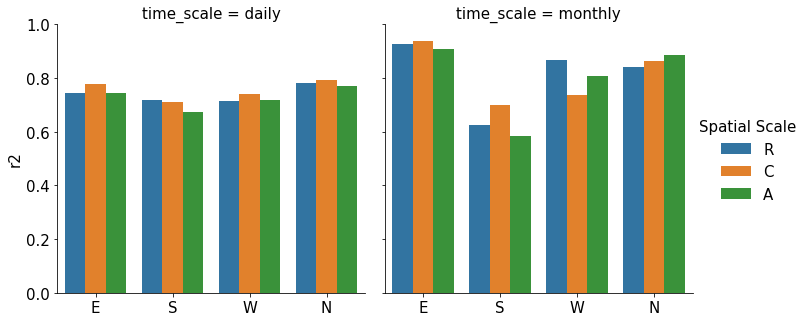

In [3]:
df_gas = df[(df["gas"]=="_gas")&(df["time_scale"]!="monthly_le")]
g = sns.catplot(x = "loc", y = "r2", 
            hue="spatial_scale", hue_order=["R","C","A"],
            col="time_scale", 
            data=df_gas,
            kind="bar")
plt.ylim(0,1)
g._legend.set_title("Spatial Scale")
g.set(xlabel="")
plt.savefig("../figures/fig8_a.pdf")
plt.show()

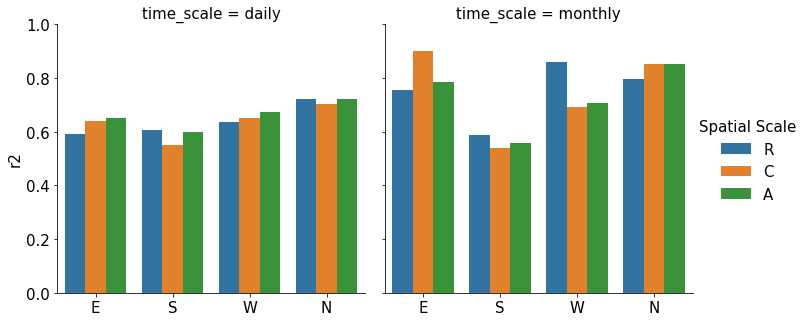

In [4]:
df_no_gas = df[(df["gas"]!="_gas")&(df["time_scale"]!="monthly_le")]
g = sns.catplot(x = "loc", y = "r2", 
            hue="spatial_scale", hue_order=["R","C","A"],
            col="time_scale", 
            data=df_no_gas,
            kind="bar")
plt.ylim(0,1)
g._legend.set_title("Spatial Scale")
g.set(xlabel="")
plt.show()

## calculate difference

In [5]:
y = df_gas[["loc","spatial_scale","time_scale","r2"]].copy().rename(columns={"r2":"R2_Y"})
n = df_no_gas[["loc","spatial_scale","time_scale","r2"]].copy().rename(columns={"r2":"R2_N"})

diff = y.merge(n, on=["loc","spatial_scale","time_scale"],how="inner")
diff["R2"] = diff["R2_Y"] - diff["R2_N"]

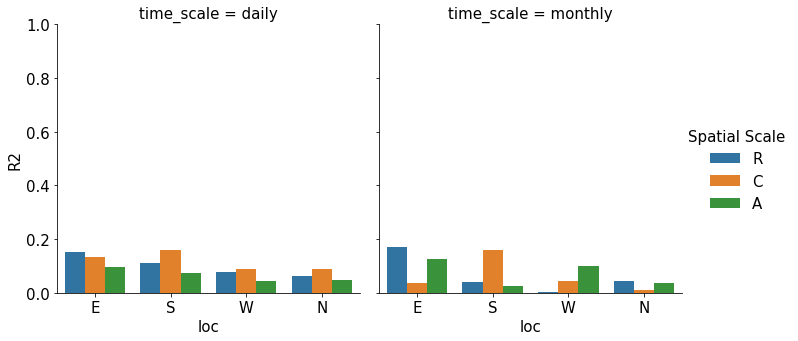

In [6]:
g = sns.catplot(x = "loc", y = "R2", 
            hue="spatial_scale", hue_order=["R","C","A"],
            col="time_scale", 
            data=diff,
            kind="bar")
plt.ylim(0,1)
g._legend.set_title("Spatial Scale")
plt.savefig("../figures/fig8_b.pdf")
plt.show()